<a href="https://colab.research.google.com/github/jeevanswaroopdasari/Cryptocurrency-Prediction-using-ARIMA-and-LSTM/blob/main/Stacked_LSTM_Models_litecoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Cryptocurrency Prediction And Forecasting Using Stacked LSTM / LSTM

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/CS725_Project/consolidated_coin_data.csv'
timeseries_data_df=pd.read_csv(file_path)
is_bitcoin = timeseries_data_df['Currency'] == 'litecoin'
df = timeseries_data_df[is_bitcoin].iloc[::-1]

In [ ]:
df.head()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
21707,litecoin,"Apr 28, 2013",4.30,4.40,4.18,4.35,0,"74,636,938"
21706,litecoin,"Apr 29, 2013",4.37,4.57,4.23,4.38,0,"75,388,964"
21705,litecoin,"Apr 30, 2013",4.40,4.57,4.17,4.30,0,"74,020,918"
21704,litecoin,"May 01, 2013",4.29,4.36,3.52,3.80,0,"65,604,596"
21703,litecoin,"May 02, 2013",3.78,4.04,3.01,3.37,0,"58,287,979"


In [ ]:
df.tail()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
19300,litecoin,"Nov 30, 2019",48.91,49.28,47.09,47.48,"2,678,481,167","3,026,175,357"
19299,litecoin,"Dec 01, 2019",47.46,48.30,46.24,47.71,"2,781,413,686","3,041,545,709"
19298,litecoin,"Dec 02, 2019",47.65,47.81,45.32,45.82,"2,680,452,035","2,921,144,389"
19297,litecoin,"Dec 03, 2019",45.78,46.62,44.76,45.38,"2,557,212,174","2,893,726,010"
19296,litecoin,"Dec 04, 2019",45.40,46.54,44.58,45.19,"2,951,880,019","2,882,011,362"


In [ ]:
df1=df.reset_index()['Close']

In [ ]:
df1
df1 = df1.str.replace(',', '')
df1 = pd.to_numeric(df1)

Text(0, 0.5, 'Values')

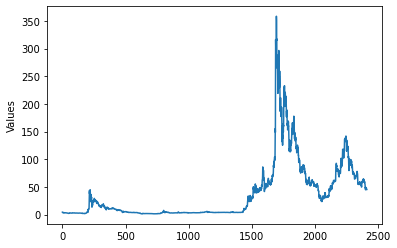

In [ ]:
import matplotlib.pyplot as plt
df1.plot.line()
plt.ylabel('Values')

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [ ]:
import numpy as np

In [ ]:
df1

0        4.35
1        4.38
2        4.30
3        3.80
4        3.37
        ...  
2407    47.48
2408    47.71
2409    45.82
2410    45.38
2411    45.19
Name: Close, Length: 2412, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1_new=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1_new)

[[0.00893107]
 [0.00901506]
 [0.00879109]
 ...
 [0.125035  ]
 [0.12380312]
 [0.12327118]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1_new)*0.65)
test_size=len(df1_new)-training_size
train_data,test_data=df1_new[0:training_size,:],df1_new[training_size:len(df1_new),:1]

In [ ]:
training_size,test_size

(1567, 845)

In [ ]:
train_data

array([[0.00893107],
       [0.00901506],
       [0.00879109],
       ...,
       [0.13116636],
       [0.1269388 ],
       [0.12861862]])

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(1466, 100)
(1466,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(744, 100)
(744,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

###Stacked LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


### Simple LSTM Model

In [ ]:
#define model
# model = Sequential()
# model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')

In [ ]:
#model.summary()

In [ ]:
history=model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)
#model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 1s 59ms/step - loss: 3.8484e-04 - val_loss: 0.0065
Epoch 2/100
23/23 [==============================] - 0s 17ms/step - loss: 9.7513e-05 - val_loss: 0.0056
Epoch 3/100
23/23 [==============================] - 0s 18ms/step - loss: 8.8189e-05 - val_loss: 0.0063
Epoch 4/100
23/23 [==============================] - 0s 18ms/step - loss: 7.8210e-05 - val_loss: 0.0042
Epoch 5/100
23/23 [==============================] - 0s 18ms/step - loss: 6.3887e-05 - val_loss: 0.0042
Epoch 6/100
23/23 [==============================] - 0s 18ms/step - loss: 6.8807e-05 - val_loss: 0.0036
Epoch 7/100
23/23 [==============================] - 0s 18ms/step - loss: 5.7267e-05 - val_loss: 0.0032
Epoch 8/100
23/23 [==============================] - 0s 21ms/step - loss: 5.3344e-05 - val_loss: 0.0029
Epoch 9/100
23/23 [==============================] - 0s 20ms/step - loss: 5.6197e-05 - val_loss: 0.0028
Epoch 10/100
23/23 [==============================] - 0s 21ms/st

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.3.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
train_predict[:5]


array([[0.00499266],
       [0.00503786],
       [0.00486143],
       [0.00469975],
       [0.0046559 ]], dtype=float32)

In [ ]:
test_predict[:5]

array([[0.1953149 ],
       [0.19645298],
       [0.18938687],
       [0.19691525],
       [0.199896  ]], dtype=float32)

In [ ]:
n,m=y_train.shape[0],ytest.shape[0]
y_train=y_train.reshape(n,1)
y_test=ytest.reshape(m,1)

In [ ]:
##Transformback to original form
train_pred=scaler.inverse_transform(train_predict)
test_pred=scaler.inverse_transform(test_predict)
y_train_act=scaler.inverse_transform(y_train)
y_test_act=scaler.inverse_transform(y_test)

In [ ]:
print(train_pred.shape,y_train_act.shape)

(1466, 1) (1466, 1)


In [ ]:
print(test_pred.shape,y_test_act.shape)

(744, 1) (744, 1)


In [ ]:
## looking at dimensions of y_train and train_predict
#print(y_train.shape), print(ytest.shape)
#y_train[:5], train_predict[:5]
#y_train_error = df1[101:training_size].values
#ytest_error = df1[training_size+101:].values
#print(y_train_error.shape), print(ytest_error.shape)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error,mean_absolute_error
def MAPE(y_true,y_pred):
  mape=np.mean(np.abs(y_true-y_pred)/y_true)*100
  return mape
print('RMSE_Train=','%0.3f'%math.sqrt(mean_squared_error(y_train_act,train_pred)))
print('RMSE_Test=','%0.3f'%math.sqrt(mean_squared_error(y_test_act,test_pred)))
print('----------------------')
print('MAE_Train=','%0.3f'%mean_absolute_error(y_train_act,train_pred))
print('MAE_Test=','%0.3f'%mean_absolute_error(y_test_act,test_pred))
print('----------------------')
print('MAPE_Train=','%0.3f'%MAPE(y_train_act,train_pred),'%')
print('MAPE_Test=','%0.3f'%MAPE(y_test_act,test_pred),'%')
print('----------------------')

RMSE_Train= 1.201
RMSE_Test= 10.804
----------------------
MAE_Train= 0.494
MAE_Test= 5.281
----------------------
MAPE_Train= 5.794 %
MAPE_Test= 4.458 %
----------------------


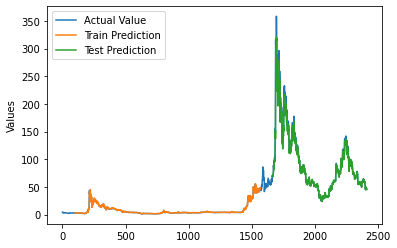

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1_new)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(train_pred)+look_back, :] = train_pred
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1_new)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_pred
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1_new),label='Actual Value')
plt.plot(trainPredictPlot,label='Train Prediction')
plt.plot(testPredictPlot,label='Test Prediction')
plt.ylabel('Values')
plt.legend()
plt.show()

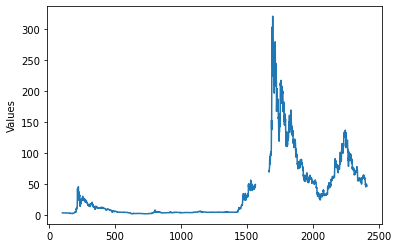

In [ ]:
final_predict = numpy.empty_like(df1_new)
final_predict[:, :] = np.nan
final_predict[look_back:len(train_predict)+look_back, :] = train_pred
final_predict[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_pred
plt.plot(final_predict)
plt.ylabel('Values')
plt.show()

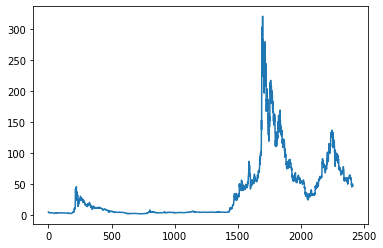

In [ ]:
final_predict[len(train_predict)+look_back:len(train_predict)+(look_back*2)+1, :] = scaler.inverse_transform(df1_new)[len(train_predict)+look_back:len(train_predict)+(look_back*2)+1, :]
final_predict[:look_back, :] = scaler.inverse_transform(df1_new)[:look_back, :]
plt.plot(final_predict)
plt.show()

<function matplotlib.pyplot.show>

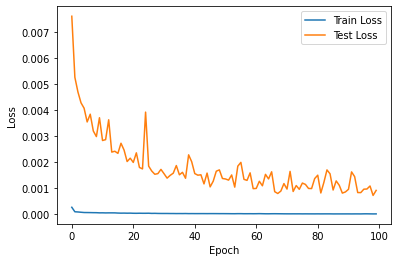

In [ ]:
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show